In [1]:
import os
import json
import shutil
from glob import glob
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## CSV file

In [2]:
data_path = "../dataset/Water_Week"
dir_list = sorted(os.listdir(data_path))

1. 하나의 .csv 파일에 하루 1시간씩 주일동안(토, 일 제외) 측정된 값들이 존재
2. 각 지역마다 대략 100주(남강은 73주) 이상 측정하였음. 총 record는 12000개 이상 (ETTh: 17420 record)
3. 기본 컬럼은 21개. E 파일에는 추가적으로 34개의 컬럼이 존재. 또한 결측이 있는 컬럼들도 C,D,E 마다 모두 다름

In [3]:
for dir in dir_list[:-1]:
    data_list = glob(os.path.join(data_path, dir, "csv/*.csv"))
    print(f"{dir} number of file : {len(data_list)}")

C001팔당2취 number of file : 104
D001청주정 number of file : 100
D002구미 number of file : 101
D003고령 number of file : 101
D004주암 number of file : 106
E003본포 number of file : 103
E004남강 number of file : 73


In [4]:
print(dir_list[0])
data_list = glob(os.path.join(data_path, dir_list[0], "csv/*.csv"))
data_sample1 = pd.read_csv(data_list[0])
data_sample1

C001팔당2취


,measure_id,measure_date,turbidity,EC,pH,water_temp,DO,TOC,algae,alkalinity,...,residual_Cl,blue-green_algae,diatomeae,cryptophyceae,2-MIB,Geosmin,synedra,T-N,T-P,Mn
0,C001,2021-05-26 11:00,5.0768,211.6250,7.9777,18.0427,NaN,3.0511,18.3302,46.2682,...,0.2839,0,12.3046,0.0,3.37,1.9,NaN,NaN,NaN,NaN
1,C001,2021-05-26 12:00,5.0622,204.3552,7.7909,17.9316,NaN,3.0105,22.5832,44.8952,...,0.0886,0,16.4116,0.0,3.37,1.9,NaN,NaN,NaN,NaN
2,C001,2021-05-26 13:00,5.0602,200.3667,7.8099,17.8312,NaN,2.9125,23.5886,44.8686,...,0.0915,0,17.3913,0.0,3.37,1.9,NaN,NaN,NaN,NaN
3,C001,2021-05-26 14:00,5.0166,202.7396,7.7920,17.7354,NaN,2.9175,24.5529,44.8618,...,0.0901,0,18.5605,0.0,3.37,1.9,NaN,NaN,NaN,NaN
4,C001,2021-05-26 15:00,4.9504,204.0635,7.7901,17.8251,NaN,2.9075,24.3805,45.3890,...,0.0856,0,19.3880,0.0,3.37,1.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,C001,2021-05-31 6:00,5.0633,181.4500,7.4378,17.2372,NaN,2.3495,11.5485,45.3858,...,0.1579,0,7.9976,0.0,3.37,1.9,NaN,NaN,NaN,NaN
116,C001,2021-05-31 7:00,5.2437,190.1833,7.4387,17.2689,NaN,2.2856,11.0268,46.3848,...,0.2611,0,8.0505,0.0,3.37,1.9,NaN,NaN,NaN,NaN
117,C001,2021-05-31 8:00,5.3817,183.7031,7.4348,17.2024,NaN,2.3747,9.8485,44.9882,...,0.2817,0,8.0505,0.0,3.37,1.9,NaN,NaN,NaN,NaN
118,C001,2021-05-31 9:00,5.5740,184.5125,7.4182,17.1951,NaN,2.3393,10.1145,45.0049,...,0.3608,0,8.0076,0.0,3.37,1.9,NaN,NaN,NaN,NaN


In [6]:
print(dir_list[1])
data_list = glob(os.path.join(data_path, dir_list[1], "csv/*.csv"))
data_sample2 = pd.read_csv(data_list[0])
data_sample2

D001청주정


,measure_id,measure_date,turbidity,EC,pH,water_temp,DO,TOC,algae,alkalinity,...,residual_Cl,blue-green_algae,diatomeae,cryptophyceae,2-MIB,Geosmin,synedra,T-N,T-P,Mn
0,D001,2021-08-04 11:00,3.3261,170.025,7.1107,23.7180,NaN,NaN,NaN,34.5969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D001,2021-08-04 12:00,3.3198,169.859,7.1113,23.7893,NaN,NaN,NaN,34.5849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D001,2021-08-04 13:00,3.2813,170.059,7.1103,23.8383,NaN,NaN,NaN,35.4744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D001,2021-08-04 14:00,3.3693,170.339,7.1117,23.8651,NaN,NaN,NaN,36.1689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D001,2021-08-04 15:00,3.3407,170.527,7.1138,23.9247,NaN,NaN,NaN,36.2136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,D001,2021-08-09 6:00,3.2749,172.413,7.1308,25.7667,NaN,NaN,NaN,36.1840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,D001,2021-08-09 7:00,3.2474,172.006,7.1406,25.4945,NaN,NaN,NaN,36.1631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,D001,2021-08-09 8:00,3.0235,171.922,7.1403,25.6969,NaN,NaN,NaN,36.1871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,D001,2021-08-09 9:00,2.9396,172.725,7.1394,25.7620,NaN,NaN,NaN,36.1809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(dir_list[5])
data_list = glob(os.path.join(data_path, dir_list[5], "csv/*.csv"))
data_sample3 = pd.read_csv(data_list[0])
data_sample3

E003본포


,measure_id,measure_date,turbidity,EC,pH,water_temp,DO,TOC,algae,alkalinity,...,dw_power_discharge,dw_intake,dw_gate_discharge,p_turbidity,p_EC,p_DO,p_water_temp,p_TOC,p_T-N,p_T-P
0,D006,2020-08-19 11:00,NaN,187.843,7.0646,NaN,NaN,NaN,NaN,34.8301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D006,2020-08-19 12:00,NaN,191.829,7.0601,NaN,NaN,NaN,NaN,35.4372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D006,2020-08-19 13:00,NaN,194.436,7.0686,NaN,NaN,NaN,NaN,35.4488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D006,2020-08-19 14:00,NaN,195.691,7.0489,NaN,NaN,NaN,NaN,36.2991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D006,2020-08-19 15:00,NaN,196.468,7.0599,NaN,NaN,NaN,NaN,36.1118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,D006,2020-08-24 6:00,NaN,207.367,7.2615,NaN,NaN,NaN,NaN,36.9121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,D006,2020-08-24 7:00,NaN,209.732,7.2481,NaN,NaN,NaN,NaN,38.6445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,D006,2020-08-24 8:00,NaN,211.894,7.2175,NaN,NaN,NaN,NaN,38.6367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,D006,2020-08-24 9:00,NaN,212.610,7.2171,NaN,NaN,NaN,NaN,38.5698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(f"Total columns : {len(data_sample1.columns)}, Usable columns: {len(data_sample1.dropna(1).columns)}")
data_sample1.columns, data_sample1.dropna(1).columns

Total columns : 21, Usable columns: 16


/tmp/ipykernel_4130480/2852265639.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  print(f"Total columns : {len(data_sample1.columns)}, Usable columns: {len(data_sample1.dropna(1).columns)}")
/tmp/ipykernel_4130480/2852265639.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_sample1.columns, data_sample1.dropna(1).columns


(Index(['measure_id', 'measure_date', 'turbidity', 'EC', 'pH', 'water_temp',
        'DO', 'TOC', 'algae', 'alkalinity', 'blue_algae', 'residual_Cl',
        'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin',
        'synedra', 'T-N', 'T-P', 'Mn'],
       dtype='object'),
 Index(['measure_id', 'measure_date', 'turbidity', 'EC', 'pH', 'water_temp',
        'TOC', 'algae', 'alkalinity', 'blue_algae', 'residual_Cl',
        'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin'],
       dtype='object'))

In [12]:
print(f"Total columns : {len(data_sample2.columns)}, Usable columns: {len(data_sample2.dropna(1).columns)}")
data_sample2.columns, data_sample2.dropna(1).columns

Total columns : 21, Usable columns: 7


/tmp/ipykernel_4130480/546386420.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  print(f"Total columns : {len(data_sample2.columns)}, Usable columns: {len(data_sample2.dropna(1).columns)}")
/tmp/ipykernel_4130480/546386420.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_sample2.columns, data_sample2.dropna(1).columns


(Index(['measure_id', 'measure_date', 'turbidity', 'EC', 'pH', 'water_temp',
        'DO', 'TOC', 'algae', 'alkalinity', 'blue_algae', 'residual_Cl',
        'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin',
        'synedra', 'T-N', 'T-P', 'Mn'],
       dtype='object'),
 Index(['measure_id', 'measure_date', 'turbidity', 'EC', 'pH', 'water_temp',
        'alkalinity'],
       dtype='object'))

In [13]:
print(f"Total columns : {len(data_sample3.columns)}, Usable columns: {len(data_sample3.dropna(1).columns)}")
data_sample3.columns, data_sample3.dropna(1).columns

Total columns : 55, Usable columns: 16


/tmp/ipykernel_4130480/821674034.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  print(f"Total columns : {len(data_sample3.columns)}, Usable columns: {len(data_sample3.dropna(1).columns)}")
/tmp/ipykernel_4130480/821674034.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_sample3.columns, data_sample3.dropna(1).columns


(Index(['measure_id', 'measure_date', 'turbidity', 'EC', 'pH', 'water_temp',
        'DO', 'TOC', 'algae', 'alkalinity', 'blue_algae', 'residual_Cl',
        'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin',
        'synedra', 'T-N', 'T-P', 'Mn', 'temp', 'precipitation', 'wind_velocity',
        'up_turbidity', 'up_EC', 'up_pH', 'up_water_temp', 'up_DO', 'up_TOC',
        'up_T-N', 'up_T-P', 'up_water_level', 'up_water_volume',
        'up_water_rates', 'up_inflow', 'up_total_discharge',
        'up_power_discharge', 'up_intake', 'up_gate_discharge',
        'dw_water_level', 'dw_water_volume', 'dw_water_rates', 'dw_inflow',
        'dw_total_discharge', 'dw_power_discharge', 'dw_intake',
        'dw_gate_discharge', 'p_turbidity', 'p_EC', 'p_DO', 'p_water_temp',
        'p_TOC', 'p_T-N', 'p_T-P'],
       dtype='object'),
 Index(['measure_id', 'measure_date', 'EC', 'pH', 'alkalinity', 'temp',
        'precipitation', 'wind_velocity', 'up_turbidity', 'up_EC', 'up_pH'

In [14]:
data_sample2.columns.intersection(data_sample3.columns)

Index(['measure_id', 'measure_date', 'turbidity', 'EC', 'pH', 'water_temp',
       'DO', 'TOC', 'algae', 'alkalinity', 'blue_algae', 'residual_Cl',
       'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin',
       'synedra', 'T-N', 'T-P', 'Mn'],
      dtype='object')

### Statistics

In [15]:
data_sample1.dropna(1).describe()

/tmp/ipykernel_4130480/2987556214.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_sample1.dropna(1).describe()


,turbidity,EC,pH,water_temp,TOC,algae,alkalinity,blue_algae,residual_Cl,blue-green_algae,diatomeae,cryptophyceae,2-MIB,Geosmin
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,1.200000e+02,1.200000e+02
mean,4.915260,187.643490,7.658513,17.464858,2.679061,18.169837,43.600549,1.221010,0.107917,0.0,12.754998,1.314775,3.370000e+00,1.900000e+00
std,0.246467,12.595568,0.287461,0.380682,0.240552,5.971757,2.548608,1.099658,0.046276,0.0,5.311584,2.615450,8.919025e-16,4.459512e-16
min,4.393600,163.672900,7.333300,16.759800,2.255700,9.848500,38.337200,0.000000,0.069300,0.0,3.170500,0.000000,3.370000e+00,1.900000e+00
25%,4.757450,177.646900,7.407100,17.136925,2.465100,12.953300,41.688675,0.207675,0.091325,0.0,8.046850,0.000000,3.370000e+00,1.900000e+00
50%,4.930550,186.852600,7.537600,17.433950,2.654800,15.460150,43.290000,1.061850,0.099850,0.0,10.369450,0.000000,3.370000e+00,1.900000e+00
75%,5.055075,197.598450,7.883125,17.817525,2.878075,23.687600,45.445700,1.739975,0.105900,0.0,17.191825,0.672328,3.370000e+00,1.900000e+00
max,5.799100,214.708300,8.377600,18.154500,3.320000,30.820300,48.825600,3.981200,0.382900,0.0,24.019500,9.562000,3.370000e+00,1.900000e+00


In [16]:
data_sample2.dropna(1).describe()

/tmp/ipykernel_4130480/1817506884.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_sample2.dropna(1).describe()


,turbidity,EC,pH,water_temp,alkalinity
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,3.313604,171.926671,7.127676,25.038435,36.146191
std,0.240565,0.842228,0.015349,0.564925,0.494661
min,2.931300,169.859000,7.047800,23.718000,34.584900
25%,3.134775,171.339000,7.117575,24.767550,35.790550
50%,3.284150,172.103500,7.124750,25.095650,36.178750
75%,3.441700,172.577000,7.135750,25.506625,36.381475
max,4.250900,173.350000,7.177000,26.089300,37.582800


In [17]:
data_sample3.dropna(1).describe()

/tmp/ipykernel_4130480/527923983.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_sample3.dropna(1).describe()


,EC,pH,alkalinity,temp,precipitation,wind_velocity,up_turbidity,up_EC,up_pH,up_water_temp,up_DO,up_TOC,up_T-N,up_T-P
count,120.000000,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,189.168933,7.208863,35.290755,28.186667,0.0,1.318333,16.341667,162.525000,8.524167,29.225000,11.946667,3.768377,1.827167,0.020646
std,12.486898,0.088043,1.992398,3.637340,0.0,0.736672,19.650302,13.623363,0.476682,1.148053,1.366225,0.024906,0.191857,0.005824
min,168.184000,7.038600,31.274200,22.800000,0.0,0.200000,4.400000,138.000000,7.400000,27.000000,9.200000,3.725776,1.425000,0.011000
25%,177.321500,7.128375,33.469750,25.275000,0.0,0.800000,5.600000,155.750000,8.200000,28.500000,10.800000,3.747076,1.654750,0.016000
50%,190.286000,7.225100,35.395350,27.450000,0.0,1.150000,8.950000,162.000000,8.500000,29.100000,12.592308,3.768377,1.900000,0.019500
75%,202.238250,7.279787,37.038925,31.125000,0.0,1.600000,16.650000,172.000000,8.900000,29.800000,12.905000,3.789678,1.989500,0.025167
max,212.610000,7.344700,38.644500,36.200000,0.0,3.400000,104.300000,190.000000,9.400000,32.100000,13.400000,3.810979,2.127000,0.033000


### Plotting

In [18]:
## 한번만
data_sample1["measure_date"] = data_sample1["measure_date"].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))
data_sample2["measure_date"] = data_sample2["measure_date"].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))
data_sample3["measure_date"] = data_sample3["measure_date"].map(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))

Text(0, 0.5, 'Value')

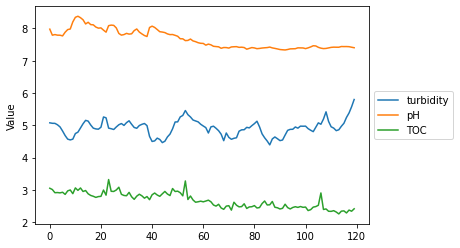

In [19]:
sns.lineplot(x = data_sample1.index, y = "turbidity",  data = data_sample1)
sns.lineplot(x = data_sample1.index, y = "pH",  data = data_sample1)
sns.lineplot(x = data_sample1.index, y = "TOC",  data = data_sample1)
plt.legend(labels = ["turbidity","pH", "TOC"], loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel("Value")

In [20]:
## 정규화
num_cols = data_sample1.select_dtypes(include = np.number).columns
sample1_reg = data_sample1.copy()
sample1_reg[num_cols] = StandardScaler().fit_transform(sample1_reg[num_cols])

/home/choheeseung/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/choheeseung/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/home/choheeseung/anaconda3/envs/torch/lib/python3.8/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


Text(0, 0.5, 'Value')

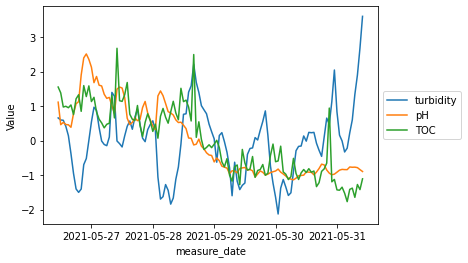

In [21]:
sns.lineplot(x = "measure_date", y = "turbidity",  data = sample1_reg)
sns.lineplot(x = "measure_date", y = "pH",  data = sample1_reg)
sns.lineplot(x = "measure_date", y = "TOC",  data = sample1_reg)
plt.legend(labels = ["turbidity","pH", "TOC"], loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel("Value")

## JSON

In [10]:
print(dir_list[0])
json_list = glob(os.path.join(data_path, dir_list[0], "hw3_json/*.json"))
with open(json_list[0], 'r') as f:
    label1 = json.load(f)

C001팔당2취


In [11]:
print(dir_list[1])
json_list = glob(os.path.join(data_path, dir_list[1], "hw3_json/*.json"))
with open(json_list[0], 'r') as f:
    label2 = json.load(f)

D001청주정


In [12]:
print(dir_list[5])
json_list = glob(os.path.join(data_path, dir_list[5], "hw3_json/*.json"))
with open(json_list[0], 'r') as f:
    label3 = json.load(f)

E003본포


1. h: label에 대한 기본 정보들. input_count, input_serial에 각각 예측에 넣어야 하는 값들이 지정되어있는듯
- input: 월요일 11시 ~ 토요일 10시
- output: 토요일 11시(추정)
2. w: 해당 지점에서의 예측값을 나타냄. None이 아닌 값들을 예측해야 하는 것으로 추정
3. E004남강 csv와 json 파일 이름 매치 안됨.
4. Input serial 중 매칭되는거는 E만

In [13]:
print(dir_list[5])
json_list = glob(os.path.join(data_path, dir_list[5], "hw3_json/*.json"))
with open(json_list[0], 'r') as f:
    label3 = json.load(f)

E003본포


In [14]:
label3["h"]

{'measure_id': 'D006',
 'division': '취수원',
 'reservoir': '본포',
 'name': '본포',
 'address': '경남 창원시 의창구 동읍 본포리 219-5',
 'longitude': 128.6421,
 'latitude': 35.36984,
 'measure_cycle': 'h',
 'measure_start_date': '2021-08-18 11:00',
 'measure_end_date': '2021-08-23 10:00',
 'measure_count': 120,
 'input_count': 14,
 'input_serial': 'EC,pH,alkalinity,temp,precipitation,wind_velocity,up_turbidity,up_EC,up_pH,up_water_temp,up_DO,up_TOC,up_T-N,up_T-P'}

In [15]:
label3["w"]

{'measure_id': 'E003',
 'division': '상수원',
 'reservoir': '반송(본포)',
 'name': '반송',
 'address': '경남 창원시 성산구 반림동 25',
 'longitude': 128.668051,
 'latitude': 35.2424723,
 'measure_date': '2021-08-23',
 'turbidity': None,
 'EC': None,
 'pH': None,
 'water_temp': None,
 'DO': None,
 'TOC': None,
 'algae': None,
 'alkalinity': None,
 'blue_algae': None,
 'residual_Cl': None,
 'blue-green_algae': 5015,
 'diatomeae': 14,
 'cryptophyceae': None,
 '2-MIB': 0.003,
 'Geosmin': 0.002,
 'synedra': None,
 'T-N': None,
 'T-P': None,
 'Mn': None,
 'temp': 21.3,
 'precipitation': 116.9,
 'wind_velocity': 714.4,
 'up_turbidity': None,
 'up_EC': 253.1805,
 'up_pH': 6.94555,
 'up_water_temp': None,
 'up_DO': None,
 'up_TOC': None,
 'up_T-N': None,
 'up_T-P': None,
 'up_water_level': None,
 'up_water_volume': None,
 'up_water_rates': None,
 'up_inflow': None,
 'up_total_discharge': None,
 'up_power_discharge': None,
 'up_intake': None,
 'up_gate_discharge': None,
 'Unnamed: 46': None,
 'dw_water_level': None

## Merge to one dataset
E003본포, E004남강의 경우 Label에서 제시하는 Input series와 input columns이 맞음

In [4]:
root_path = "../dataset/Water_Week"
data_path = "E004남강"
data_list = sorted(glob(os.path.join(root_path, data_path, "csv/*.csv")))
label_list = sorted(glob(os.path.join(root_path, data_path, "hw3_json/*.json")))

In [5]:
df_raw = pd.DataFrame()
for file in data_list:
    df_ = pd.read_csv(file)
    df_raw = pd.concat([df_raw, df_], axis = 0, ignore_index= True)
num_cols = list(df_raw.select_dtypes(include = np.number).columns)
print(df_raw.shape)

(8760, 55)


In [6]:
target_vals = []
for js in label_list:
    with open(js, 'r') as f:
        label = json.load(f)
    input_cols = label['h']['input_serial'].split(',')   
    target_cols = [k for k,v in label['w'].items() if (v is not None) & (k in num_cols)]
    vals = [label['w'][k] for k in target_cols]
    target_vals.append(vals)
target_vals = np.array(target_vals)

In [7]:
## Input
df_raw = df_raw[df_raw.columns.intersection(input_cols)]

In [8]:
df_raw

,turbidity,EC,pH,water_temp,DO,Mn,temp,precipitation,wind_velocity,dw_water_level,dw_water_volume,dw_water_rates,dw_inflow,dw_total_discharge,dw_power_discharge
0,4.7639,99.7776,8.2224,20.3705,7.7357,0.0449,23.8,0.0,1.7,39.870,151.5390,49.0,0.000,30.959,26.997
1,4.8275,99.6505,8.1813,20.3134,7.4990,0.0491,24.6,0.0,1.7,39.870,151.5390,49.0,30.938,30.855,26.873
2,4.9434,99.4501,8.1259,20.2081,7.0978,0.0491,25.6,0.0,3.2,39.870,151.5390,49.0,30.949,30.957,26.922
3,5.0652,98.5436,8.0787,20.1472,6.9274,0.0491,25.2,0.0,2.5,39.860,151.2760,48.9,0.000,30.912,26.878
4,5.1321,96.8066,8.0340,19.9609,6.6718,0.0525,25.7,0.0,3.8,39.860,151.2760,48.9,30.980,30.969,26.936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2.1802,134.0680,7.7895,23.4075,7.0900,0.0391,16.5,0.0,0.7,38.083,107.7558,34.9,6.504,31.693,27.720
8756,2.1280,134.0400,7.7901,23.3915,7.0952,0.0367,16.9,0.0,0.0,38.080,107.6879,34.8,0.000,32.165,27.720
8757,2.0960,134.0350,7.7864,23.3722,7.0198,0.0369,17.8,0.0,2.0,38.080,107.6879,34.8,32.301,32.289,27.693
8758,2.1127,134.0620,7.7837,23.3680,7.2097,0.0393,19.0,0.0,2.3,38.077,107.6200,34.8,19.686,32.218,27.653


In [10]:
df_raw[df_raw.duplicated()]

,turbidity,EC,pH,water_temp,DO,Mn,temp,precipitation,wind_velocity,dw_water_level,dw_water_volume,dw_water_rates,dw_inflow,dw_total_discharge,dw_power_discharge
1560,3.6677,86.7554,7.3951,18.6570,8.9291,0.0290,15.4,0.0,3.9,39.350,138.119,44.7,31.881,31.867,27.460
1561,3.6723,86.6415,7.3892,18.6719,8.9559,0.0351,16.7,0.0,4.2,39.350,138.119,44.7,31.244,29.991,25.591
1562,3.5994,86.9093,7.3941,18.6920,8.9871,0.0437,16.7,0.0,3.6,39.350,138.119,44.7,4.401,4.402,0.000
1563,3.5561,86.5756,7.4013,18.6983,8.9744,0.0421,17.2,0.0,3.7,39.360,138.372,44.8,144.935,4.496,0.000
1564,3.6621,86.1666,7.3932,18.6724,8.9839,0.0395,17.4,0.0,3.5,39.360,138.372,44.8,4.476,4.463,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,2.4410,110.9170,7.3541,20.1992,7.2510,0.0351,11.1,0.0,3.0,40.929,180.425,58.4,0.000,3.959,0.000
7892,2.3351,110.9170,7.3541,20.1992,7.2510,0.0331,10.1,0.0,2.0,40.931,180.480,58.4,19.172,4.190,0.000
7893,2.3415,110.9170,7.3541,20.1992,7.2510,0.0319,9.7,0.0,0.7,40.932,180.508,58.4,0.000,4.509,0.000
7894,2.3879,110.9170,7.3541,20.1992,7.2510,0.0314,10.2,0.0,2.3,40.931,180.480,58.4,19.822,5.091,0.764


<AxesSubplot:ylabel='up_pH'>

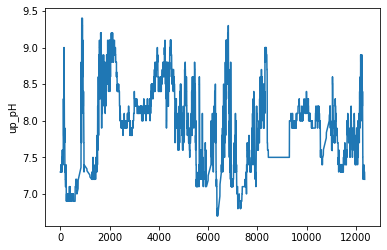

In [48]:
sns.lineplot(x = df_raw.index, y = "up_pH", data = df_raw)

In [42]:
## Output
pd.DataFrame(target_vals, columns = target_cols)

,blue-green_algae,diatomeae,2-MIB,Geosmin,temp,precipitation,wind_velocity,up_EC,up_pH
0,21773.0,0.0,0.007,0.014,27.9,178.2,916.9,299.7375,7.07485
1,183.0,14.0,0.008,0.006,28.7,177.3,825.3,272.5100,7.05640
2,255.0,28.0,0.000,0.006,28.5,164.5,533.9,191.4935,6.84345
3,141.0,0.0,0.002,0.005,28.1,169.9,535.6,171.2730,6.88330
4,0.0,0.0,0.002,0.003,24.1,140.9,1171.6,154.6045,6.93705
...,...,...,...,...,...,...,...,...,...
98,425.0,0.0,0.000,0.006,25.8,21.0,2.6,471.2515,7.72945
99,183.0,0.0,0.008,0.014,26.7,85.0,3.9,449.6235,7.53450
100,800.0,0.0,0.000,0.032,17.2,18.0,1.6,442.1030,7.58775
101,1041.0,0.0,0.007,0.037,21.4,57.5,2.7,447.1990,8.08990


다른 데이터는 label에서 제시하는 input과 실제 데이터 컬럼이 안맞음. 상관 없는 것인지 확인 필요

In [ ]:
root_path = "dataset/Water_Week"
data_path = "D001청주정"
data_list = sorted(glob(os.path.join(root_path, data_path, "csv/*.csv")))
label_list = sorted(glob(os.path.join(root_path, data_path, "hw3_json/*.json")))

In [ ]:
df_raw = pd.DataFrame()
for file in data_list:
    df_ = pd.read_csv(file)
    df_raw = pd.concat([df_raw, df_], axis = 0, ignore_index= True)
num_cols = list(df_raw.select_dtypes(include = np.number).columns)
print(df_raw.shape)

(12000, 21)


In [ ]:
def Exception_value(v):
    if str(v).__contains__(','):
        v = float(v.replace(',',''))
    if str(v).__contains__('NA'):
        v = np.nan
    
    return float(v)


In [ ]:
label_list = sorted(glob(os.path.join(root_path, data_path, "hw3_json/*.json")))
target_cols = ['turbidity', 'EC', 'pH', 'water_temp',
    'DO', 'TOC', 'algae', 'alkalinity', 'blue_algae', 'residual_Cl',
    'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin',
    'synedra', 'T-N', 'T-P', 'Mn',]
target_vals = []
for js in label_list:
    with open(js, 'r') as f:
        label = json.load(f)
    input_cols = label['h']['input_serial'].split(',')   
    target_cols = [k for k,v in label['w'].items() if (v is not None) & (k in target_cols)]
    vals = [Exception_value(label['w'][k]) for k in target_cols]        
    #vals = [v.replace(',','') if str(v).__contains__(',') else v for v in vals ] ## Exception1, remove comma    
    target_vals.append(vals)    
df = pd.DataFrame(target_vals, columns = target_cols, dtype=float)
df.dropna(axis = 1)

,TOC,blue-green_algae,diatomeae,2-MIB,Geosmin,synedra,Mn
0,2.2,370.0,337.0,0.000,0.003,2.0,0.040
1,2.2,283.0,332.0,0.002,0.006,7.0,0.031
2,2.8,25.0,299.0,0.000,0.002,14.0,0.076
3,2.7,80.0,353.0,0.000,0.002,58.0,0.025
4,3.1,97.0,374.0,0.000,0.002,34.0,0.056
...,...,...,...,...,...,...,...
95,2.2,0.0,2051.0,0.000,0.000,1.0,0.032
96,2.2,0.0,1656.0,0.000,0.000,1.0,0.024
97,2.1,0.0,948.0,0.000,0.000,3.0,0.016
98,2.2,0.0,727.0,0.000,0.000,2.0,0.023


In [ ]:
from sklearn.preprocessing import StandardScaler
x_data = df_raw[df_raw.columns.intersection(input_cols)]

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(x_data.values)

array([[-0.74048543, -1.79098553, -2.44571023,  0.92765618,  0.75249525],
       [-0.74791412, -1.87055401, -2.4613254 ,  0.97036118,  0.75057515],
       [-0.74656345, -2.01626247, -2.47665665,  1.00373055,  0.75089772],
       ...,
       [-0.37629813,  0.66180235,  0.70599738, -1.38312734,  0.52264357],
       [-0.38751908,  0.67010407,  0.68470398, -1.39096979,  0.5236113 ],
       [-0.48978036,  0.66780785,  0.61968812, -1.39563112,  0.51488635]])